In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
from netCDF4 import Dataset
import numpy as np

# Import Data

In [3]:
my_example_nc_file = '/Users/aitorizquierdo/Desktop/air-quality-madrid/sentinel/S5P_OFFL_L2__NO2____20190108T111459_20190108T125629_06414_01_010202_20190114T133207.nc'

In [4]:
fh = Dataset(my_example_nc_file, mode='r')

# Understanding what's inside

In [5]:
def walktree(top):
    values = top.groups.values()
    yield values
    for value in top.groups.values():
        for children in walktree(value):
            yield children
print (fh)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Conventions: CF-1.7
    institution: KNMI
    source: Sentinel 5 precursor, TROPOMI, space-borne remote sensing, L2
    summary: TROPOMI/S5P NO2 1-Orbit L2 Swath 7x3.5km
    tracking_id: ad305a49-6ac9-4734-9157-64ba8e60480a
    id: S5P_OFFL_L2__NO2____20190108T111459_20190108T125629_06414_01_010202_20190114T133207
    time_reference: 2019-01-08T00:00:00Z
    time_reference_days_since_1950: 25209
    time_reference_julian_day: 2458491.5
    time_reference_seconds_since_1970: 1546905600
    time_coverage_start: 2019-01-08T11:36:34Z
    time_coverage_end: 2019-01-08T12:34:57Z
    time_coverage_duration: PT3503.000S
    time_coverage_resolution: PT1.080S
    orbit: 6414
    references: http://www.tropomi.eu/data-products/nitrogen-dioxide
    processor_version: 1.2.2
    keywords_vocabulary: AGU index terms, http://publications.agu.org/author-resource-center/index-terms/
    keywords: 0345 Pollution, U

In [6]:
for children in walktree(fh):
    for child in children:
        print (child)

<class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3245), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixel), float32 averaging_ker

<class 'netCDF4._netCDF4.Group'>
group /METADATA/ISO_METADATA/gmd:dataQualityInfo/gmd:lineage/gmd:processStep/gmd:source#13/gmd:sourceCitation/gmd:date/gmd:dateType:
    codeList: http://www.isotc211.org/2005/resources/Codelist/gmxCodelists.xml#CI_DateTypeCode
    codeListValue: creation
    objectType: gmd:CI_DateTypeCode
    dimensions(sizes): 
    variables(dimensions): 
    groups: 

<class 'netCDF4._netCDF4.Group'>
group /METADATA/ISO_METADATA/gmd:dataQualityInfo/gmd:lineage/gmd:processStep/gmd:source#14/gmi:processedLevel:
    gmd:code: L1B
    objectType: gmd:MD_Identifier
    dimensions(sizes): 
    variables(dimensions): 
    groups: 

<class 'netCDF4._netCDF4.Group'>
group /METADATA/ISO_METADATA/gmd:dataQualityInfo/gmd:lineage/gmd:processStep/gmd:source#14/gmd:sourceCitation:
    objectType: gmd:CI_Citation
    dimensions(sizes): 
    variables(dimensions): 
    groups: gmd:date, gmd:title, gmd:alternateTitle#1

<class 'netCDF4._netCDF4.Group'>
group /METADATA/ISO_METADATA/gm

### By printing the fh.groups we can find the groups in the data, which are called ‘PRODUCT’ and ‘METADATA’. By printing fh.groups[‘PRODUCT’] we find the product has data about the dimension and variables.

In [7]:
print (fh.groups)

print (fh.groups['PRODUCT'])

OrderedDict([('PRODUCT', <class 'netCDF4._netCDF4.Group'>
group /PRODUCT:
    dimensions(sizes): scanline(3245), ground_pixel(450), corner(4), time(1), polynomial_exponents(6), intensity_offset_polynomial_exponents(1), layer(34), vertices(2)
    variables(dimensions): int32 scanline(scanline), int32 ground_pixel(ground_pixel), int32 time(time), int32 corner(corner), int32 polynomial_exponents(polynomial_exponents), int32 intensity_offset_polynomial_exponents(intensity_offset_polynomial_exponents), int32 layer(layer), int32 vertices(vertices), float32 latitude(time,scanline,ground_pixel), float32 longitude(time,scanline,ground_pixel), int32 delta_time(time,scanline), <class 'str'> time_utc(time,scanline), uint8 qa_value(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision(time,scanline,ground_pixel), float32 nitrogendioxide_tropospheric_column_precision_kernel(time,scanline,ground_pixe

In [8]:
print (fh.groups['PRODUCT'].variables.keys())

odict_keys(['scanline', 'ground_pixel', 'time', 'corner', 'polynomial_exponents', 'intensity_offset_polynomial_exponents', 'layer', 'vertices', 'latitude', 'longitude', 'delta_time', 'time_utc', 'qa_value', 'nitrogendioxide_tropospheric_column', 'nitrogendioxide_tropospheric_column_precision', 'nitrogendioxide_tropospheric_column_precision_kernel', 'averaging_kernel', 'air_mass_factor_troposphere', 'air_mass_factor_total', 'tm5_tropopause_layer_index', 'tm5_constant_a', 'tm5_constant_b'])


In [9]:
fh.groups['PRODUCT'].variables['longitude']

<class 'netCDF4._netCDF4.Variable'>
float32 longitude(time, scanline, ground_pixel)
    long_name: pixel center longitude
    units: degrees_east
    standard_name: longitude
    valid_min: -180.0
    valid_max: 180.0
    bounds: /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/longitude_bounds
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3245, 450)
filling on

In [10]:
fh.groups['PRODUCT'].variables['latitude']

<class 'netCDF4._netCDF4.Variable'>
float32 latitude(time, scanline, ground_pixel)
    long_name: pixel center latitude
    units: degrees_north
    standard_name: latitude
    valid_min: -90.0
    valid_max: 90.0
    bounds: /PRODUCT/SUPPORT_DATA/GEOLOCATIONS/latitude_bounds
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3245, 450)
filling on

In [11]:
fh.groups['PRODUCT'].variables['time_utc']

<class 'netCDF4._netCDF4.Variable'>
vlen time_utc(time, scanline)
    long_name: Time of observation as ISO 8601 date-time string
    _FillValue: 
vlen data type: <class 'str'>
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3245)

In [12]:
fh.groups['PRODUCT'].variables['qa_value']

<class 'netCDF4._netCDF4.Variable'>
uint8 qa_value(time, scanline, ground_pixel)
    units: 1
    scale_factor: 0.01
    add_offset: 0.0
    valid_min: 0
    valid_max: 100
    long_name: data quality value
    comment: A continuous quality descriptor, varying between 0 (no data) and 1 (full quality data). Recommend to ignore data with qa_value < 0.5
    coordinates: longitude latitude
    _FillValue: 255
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3245, 450)
filling on

In [13]:
fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column']

<class 'netCDF4._netCDF4.Variable'>
float32 nitrogendioxide_tropospheric_column(time, scanline, ground_pixel)
    units: mol m-2
    standard_name: troposphere_mole_content_of_nitrogen_dioxide
    long_name: Tropospheric vertical column of nitrogen dioxide
    coordinates: longitude latitude
    ancillary_variables: nitrogendioxide_tropospheric_column_precision air_mass_factor_troposphere air_mass_factor_total averaging_kernel
    multiplication_factor_to_convert_to_molecules_percm2: 6.02214e+19
    _FillValue: 9.96921e+36
path = /PRODUCT
unlimited dimensions: 
current shape = (1, 3245, 450)
filling on

In [14]:
lon_def = fh.groups['PRODUCT'].variables['longitude']

#Get Values from file for lat, lon, N0" and time
no2_2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][:]
lons = fh.groups['PRODUCT'].variables['longitude'][:]
lats = fh.groups['PRODUCT'].variables['latitude'][:]
qa=fh.groups['PRODUCT'].variables['qa_value'][:]
time = fh.groups['PRODUCT'].variables['time_utc'][:]

In [118]:
#Get Values from file for lat, lon, N0" and time
no2_2 = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'][:]
no2_2[fh.groups['PRODUCT'].variables['qa_value'][:,:]<0.75]=np.nan
lons = fh.groups['PRODUCT'].variables['longitude'][:]
lats = fh.groups['PRODUCT'].variables['latitude'][:]
qa=fh.groups['PRODUCT'].variables['qa_value'][:]
time = fh.groups['PRODUCT'].variables['time_utc'][:]

# Filtering Spain and getting the indexes of those lats and longs

Latitude goes from North to South, here is in the 2nd axis (scanline)

Longitude goes from East to West, here is in the 3rd axis (ground pixel)

In [119]:
#Spain goes from lats 35 --> 44 and lons -12 to 5 (more or less) so we will get the indexes
# of those values to then enter the NO2, wa_value and time table
idx_lat=(lats[0]>=35)*(lats[0]<=44)
idx_lon=(lons[0]>=-12)*(lons[0]<=5)
idxlat=np.nonzero(idx_lat)[0]
print('latitudes')
print(idxlat)
print(idxlat.shape)
idxlon=np.nonzero(idx_lon)[1]
print('longitudes')
print(idxlon)
print(idxlon.shape)

latitudes
[2483 2483 2483 ... 2731 2731 2732]
(65184,)
longitudes
[ 41  41  40 ... 394 395 396]
(141852,)


### CAREFUL, there can be problems if the nc doesn't have all the lons and lat you think, in this example the minimum lon doesnt get to -12, therefore there will be problems, it is always usefull to visuallize to be certain. Therefore we will use a different longitude than the one we get from above, instead of [41:396] we'll use [0:200]

In [120]:
subset_lons = lons[0,2523:2732,0:200]
print(subset_lons.shape)
subset_lats = lats[0,2523:2732,0:200]
print(subset_lats.shape)
subset_no2 = no2_2[0,2523:2732,0:200]
print(subset_no2.shape)
subset_time = time[0, 2523:2732]
print(subset_time.shape)

(209, 200)
(209, 200)
(209, 200)
(209,)


In [121]:
subset_no2

masked_array(
  data=[[nan, 1.5153568710957188e-05, 8.782357326708734e-06, ...,
         2.5106310204137117e-05, 2.3370628696284257e-05,
         1.993728983507026e-05],
        [nan, 1.0933372323052026e-05, 1.7102240690292092e-06, ...,
         2.7296560801914893e-05, 1.8954306142404675e-05,
         2.2414737031795084e-05],
        [nan, 1.3694715562451165e-05, 1.3294445125211496e-05, ...,
         1.54044264490949e-05, 6.763572855561506e-06,
         2.7463038350106217e-05],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],
  mask=[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],
  fill_value

In [122]:
flatten_lon = subset_lons.flatten()
flatten_lat = subset_lats.flatten()
flatten_no2 = subset_no2.flatten()

In [136]:
df = pd.DataFrame({'longitudes': flatten_lon,
                  'latitudes': flatten_lat,
                  'NO2': flatten_no2})

In [137]:
df

,longitudes,latitudes,NO2
0,-3.109817,31.692532,NaN
1,-3.023778,31.734859,0.000015
2,-2.938837,31.776546,0.000009
3,-2.854965,31.817612,0.000010
4,-2.772136,31.858072,0.000014
5,-2.690324,31.897945,0.000008
6,-2.609501,31.937243,0.000014
7,-2.529645,31.975983,0.000005
8,-2.450732,32.014175,0.000014
9,-2.372738,32.051842,0.000006


In [138]:
df = df.dropna()

In [139]:
df

,longitudes,latitudes,NO2
1,-3.023778,31.734859,0.000015
2,-2.938837,31.776546,0.000009
3,-2.854965,31.817612,0.000010
4,-2.772136,31.858072,0.000014
5,-2.690324,31.897945,0.000008
6,-2.609501,31.937243,0.000014
7,-2.529645,31.975983,0.000005
8,-2.450732,32.014175,0.000014
9,-2.372738,32.051842,0.000006
10,-2.295643,32.088985,0.000017


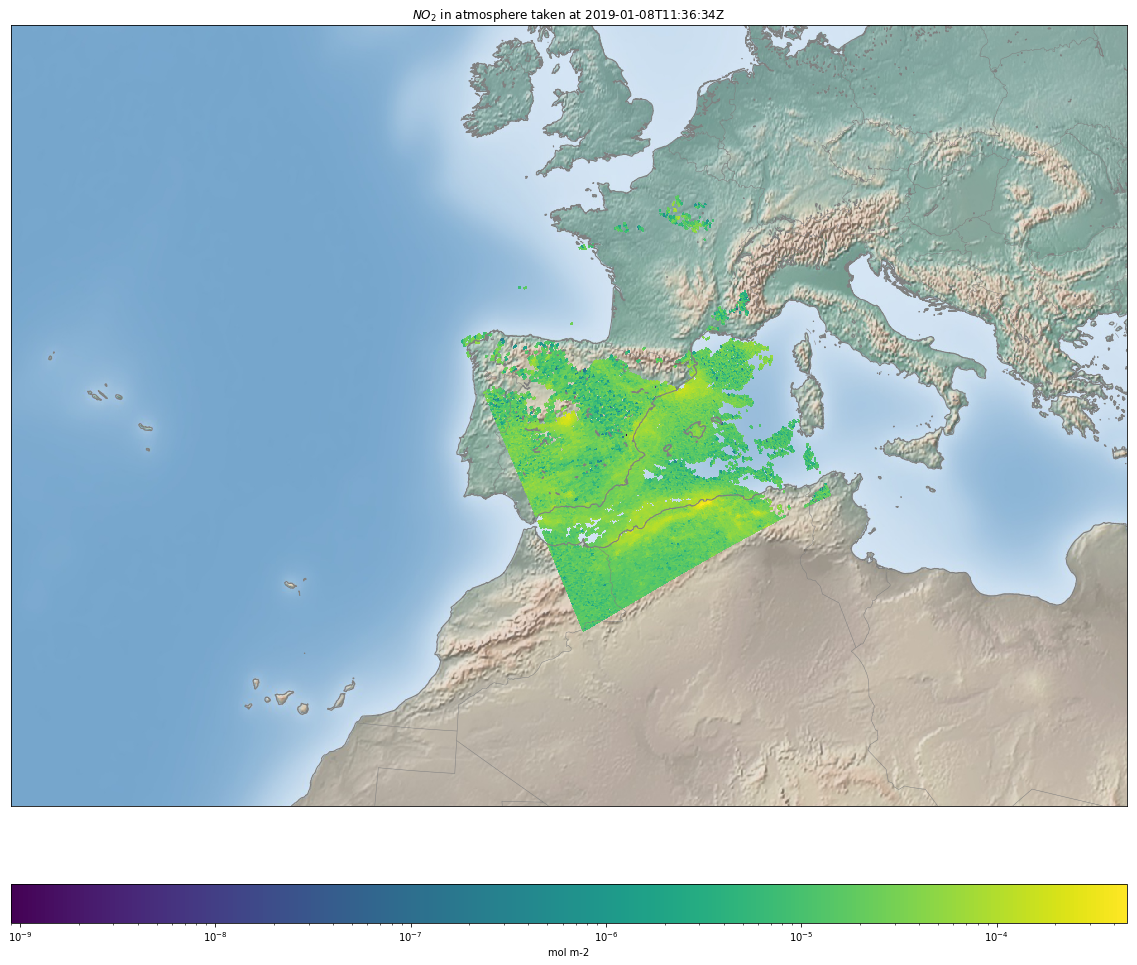

In [140]:
#my_example_nc_file = './data/NO2/S5P_NRTI_L2__NO2____20180813T133935_20180813T134435_04316_01_010100_20180813T142038.nc'
fh = Dataset(my_example_nc_file, mode='r')

no2_units = fh.groups['PRODUCT'].variables['nitrogendioxide_tropospheric_column'].units
from matplotlib.colors import LogNorm
#lon_0 = lons.mean()
#lat_0 = lats.mean()
lat_0 = 40.415363
lon_0 = -3.707398

# 1. Draw the map background
fig = plt.figure(figsize=(20, 20))
m = Basemap(projection='lcc', resolution='f', 
            lat_0=lat_0, lon_0=lon_0,
            width=5000000,height=3500000)
m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

xi, yi = m(subset_lons, subset_lats)
# Plot Data
cs = m.pcolor(xi,yi,np.squeeze(subset_no2),norm=LogNorm(), cmap='viridis')
# Add Colorbar
cbar = m.colorbar(cs, location='bottom', pad="10%")
cbar.set_label(no2_units)

# Add Title
plt.title(r'$NO_2$ in atmosphere taken at '+fh.groups['METADATA'].groups['GRANULE_DESCRIPTION'].GranuleStart)
plt.show()